In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
%store -r X_features_full
%store -r X_features_poly_full
%store -r y_labels_full

%store -r totaldf_full
X_features = X_features_full
X_features_poly = X_features_poly_full
y_labels = y_labels_full
totaldf = totaldf_full

In [2]:
seq_model = keras.models.load_model('D:\python\\full data\\first')
func_model = keras.models.load_model('D:\python\\full data\\second')
rnd_model = keras.models.load_model('D:\python\\full data\\third')
poly_model = keras.models.load_model('D:\python\\full data\\fourth')

In [3]:
totaldf.insert(7,'sequential', (np.exp(np.power(seq_model.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'functional',(np.exp(np.power(func_model.predict(X_features[2]),2)) -0.0012))
totaldf.insert(9,'3layerdeep',(np.exp(np.power(rnd_model.predict(X_features[2]),2)) -0.0012))
totaldf.insert(10,'poly',(np.exp(np.power(poly_model.predict(X_features[2]),2)) -0.0012))
totaldf.sequential = totaldf.sequential*totaldf.μob
totaldf.functional = totaldf.functional*totaldf.μob
totaldf['3layerdeep'] = totaldf['3layerdeep']*totaldf.μob
totaldf.poly = totaldf.poly*totaldf.μob

72/72 [==============================] - 0s 2ms/step


In [4]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,sequential,functional,3layerdeep,poly,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,0.998470,0.998585,0.998694,0.998792,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,1.007414,1.007508,1.008885,1.008426,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,1.015576,1.018905,1.015306,1.018305,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,1.027691,1.027661,1.020632,1.033516,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,1.039029,1.038241,1.027324,1.039544,336.150
...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3229.949353,42.548239,0.153888,0.171853,0.169448,0.170900,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3229.949353,42.548239,0.155718,0.176166,0.172699,0.173425,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3229.949353,42.548239,0.157362,0.180485,0.175838,0.175982,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3229.949353,42.548239,0.159181,0.184898,0.178798,0.178503,365.928


In [5]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(4):
        average_error.append(np.average((a.iloc[:,i+7]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+7]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+7]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+7]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['1 hidden layer','2 hidden layers','3 hidden layers','4 hidden layers'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1 hidden layer,-0.801810,4.792236,2.784125,3.982095
2 hidden layers,-1.208490,5.751127,3.344563,4.832164
3 hidden layers,-0.079283,7.010739,3.608539,6.011255
4 hidden layers,1.319429,7.498708,3.678392,6.666404


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1 hidden layer,-0.030773,3.539768,2.159435,3.486718
2 hidden layers,-0.969527,3.921185,2.686268,5.242559
3 hidden layers,-0.215188,3.864919,2.441804,5.365111
4 hidden layers,1.458672,4.850759,2.817161,5.564974


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1 hidden layer,-2.965636,6.330885,4.259406,96.989282
2 hidden layers,-3.686089,6.149596,4.191746,100.393868
3 hidden layers,-2.774424,6.446235,4.233429,101.463459
4 hidden layers,-1.539563,5.870398,3.629105,88.478391


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1 hidden layer,-1.665715,4.410642,2.657362,127.086197
2 hidden layers,-1.540274,4.419241,2.593524,159.086237
3 hidden layers,-0.123858,5.486818,3.560974,208.369249
4 hidden layers,1.092513,5.426765,3.796174,197.235671


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1 hidden layer,2.007498,6.614478,3.992433,1163.478911
2 hidden layers,9.573543,11.867589,9.920049,2257.443042
3 hidden layers,16.511302,17.520383,16.915920,3761.729543
4 hidden layers,15.325332,21.487327,15.891347,4272.999364


Text(0, 0.5, '% Average Absolute Error')

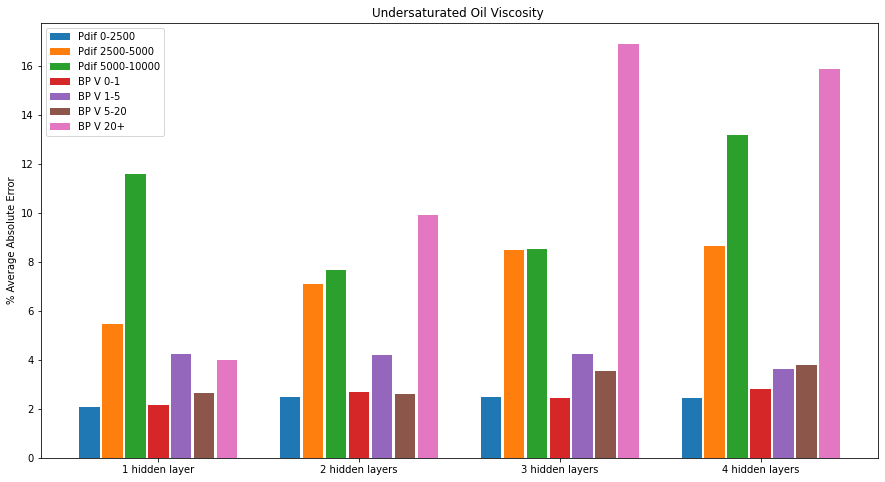

In [17]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}   
models =   ['1 hidden layer','2 hidden layers','3 hidden layers','4 hidden layers']

%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(4), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")